# Chapter 15: Eigenvalues and Eigenvectors
by [Arief Rahman Hakim](https://github.com/ahman24)

They have many applications, to name a few, finding the `natural frequencies` and `mode shapes` in dynamics systems, `solving differential equations` (we will see in later chapters), `reducing the dimensions using principal components analysis`, getting the `principal stresses in the mechanics`, and so on. Even the famous Google’s search engine algorithm - PageRank, uses the eigenvalues and eigenvectors to assign scores to the pages and rank them in the search.

## 1. Eigenvalues and Eigenvectors Problem Statement
### 1.A. Eigenvalues and Eigenvectors
We learned from last chapter that matrix A apply to column vector x, that is Ax, is a linear transformation of x. There is a special transform in the following form:

$
Ax=\lambda x
$

Where,
* `A` is `n×n matrix`, 
* `x` is `n×1 column vector` (X≠0), 
* `λ` is `scalar`. 

Any `λ` that satisfies the above equation is known as an **eigenvalue of the matrix A**,  
while the associated vector **x is called an eigenvector corresponding to λ**.

### 1.B. The Motivation Behind
The motivation behind the eigenvalues and eigenvectors is that, it helps us to understand the `characteristics of the linear transformation`, thus make things easy. 

We know that `a vector x` can be transformed to a different vector by multiplying $A - Ax$. The effect of the transformation represents **a scale of the length of the vector and/or the rotate of the vector**. The above equation points out that for *some vectors*, the effect of transformation of $Ax$ is **only scale (stretching, compressing, and flipping)**. 

The `eigenvectors` are the vectors `have this property` and the `eigenvalues` $λ$ are the `scale factors`.  
Let’s look at the following example.

**TRY IT** Plot the vector x = [[1], [1]] and the vector b=Ax, where A = [[2, 0], [0, 1]]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

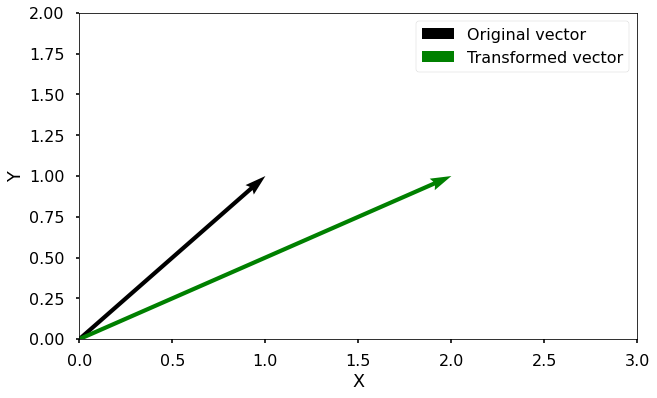

In [2]:
A = np.array([[2, 0],[0, 1]])

x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

We can see from the generated figure that the original `vector x` is **rotated and stretched longer** after transformed by `A`. The vector [[1], [1]] is transformed to [[2], [1]]. 

Let’s try to do the same exercise with a different vector [[1], [0]].

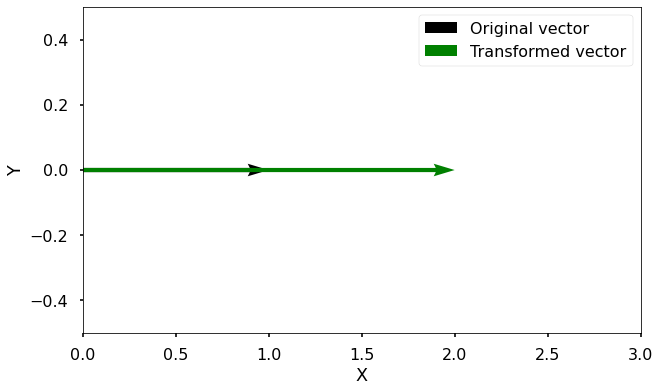

In [3]:
x = np.array([[1], [0]])
b = np.dot(A, x)

plot_vect(x,b,(0,3),(-0.5,0.5))

Now we can see that with this new vector, the only thing changed **after the transformation is the length of the vector**, it is stretched. The new vector is [[2], [0]], therefore, the transform is

$
Ax = 2x
$
with $x = [[1], [0]]$ and $\lambda=2$. 

The **direction of the vector doesn’t change at all** (no rotation). You can also try that [[0], [1]] is another eigenvector, try to verify by yourself.



### 1.C The characteristic equation
In order to get the eigenvalues and eigenvectors, from $Ax=\lambda x$, we can get the following form:

$
(A - \lambda I)x = 0
$
where,
* `I` is the identify matrix with the same dimensions as A. 

If matrix $A−\lambda I$ has an inverse, then multiply both sides with $(A−\lambda I)^{−1}$, we get a trivial solution $x=0$. Therefore, when $A−\lambda I$ is **singular (no inverse exist)**, we have a nontrivial solution, which means that the determinant is zero:

$
det(A−\lambda I)=0
$

**TRY IT!** Get the eigenvalues for matrix [[0, 2], [2, 3]]

The characteristic equation gives us

$
\begin{split}
\begin{vmatrix}
0-\lambda & 2 \\ 
2 & 3-\lambda
\end{vmatrix}
=0
\end{split}
$

Therefore, we have
$
−\lambda (3−\lambda)−4=0⇒\lambda^2 − 3\lambda−4=0
$

We get two eigenvalues:
$
\lambda_1=4,\ \lambda_2 =−1
$

**TRY IT!** Get the eigenvectors for the above two eigenvalues.
Let’s get the first eigenvector when $\lambda_1=4$, we can simply insert it back to $[A−\lambda I]x=0$, where we have:
$
\begin{split}
\begin{bmatrix}
-4 & 2 \\
2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\
\end{bmatrix}
=\begin{bmatrix}
0\\0\\
\end{bmatrix}
\end{split}
$

Therefore, we have two equations $−4x_1 + 2x_2 = 0$ and $2x_1 − x_2 = 0$, both of them indicate that $x_2 = 2x_1$. Therefore, we can have the first eigenvector as
$
\begin{split}x_1 = k_1\begin{bmatrix}
1\\2\\
\end{bmatrix}\end{split}
$

$k_1$ is a scalar vector (k1≠0), as long as we have the ratio between $x_2$ and $x_1$ as 2, **it will be an eigenvector**. We can verify the vector [[1], [2]] is an eigenvector by inserting it back:

$
\begin{split}
\begin{bmatrix}
0 & 2 \\
2 & 3 \\
\end{bmatrix}
\begin{bmatrix}
1\\2\\
\end{bmatrix}
=\begin{bmatrix}
4\\8\\
\end{bmatrix}
=4\begin{bmatrix}
1\\2\\
\end{bmatrix}
\end{split}
$

By inserting $\lambda_2 = −1$ similarly as above, we can get the other eigenvector as the following, where 
$k_2 ≠ 0 : x_2 = k_2\begin{bmatrix}
-2\\1\\
\end{bmatrix}
$

From the above example, we can see **how can we get the eigenvalues and eigenvectors** from a `matrix A`, and the chosen of the eigenvectors for a system is not unique. 

But things will become really complicated **when you have a larger matrix A** when you try to solve the $n^{th}$ order polynomial characteristic equation. Luckily, there are many different numerical methods have been developed to solve the eigenvalue problems for larger matrices. We will introduce the `power method` and the `QR method` in the next two sections.

## 2. The Power Method
### 2.A Find the largest eigenvalue
In some problems, we only need to find the **largest dominant eigenvalue and its corresponding eigenvector**. In this case, we can use the **power method - a iterative method that will converge to the largest eigenvalue**. Let’s see the following how the power method works.

Consider an `n×n matrix A` that has `n` linearly independent `real eigenvalues` $\lambda_1, \lambda_2, … , \lambda_n$ and the `corresponding eigenvectors` $v_1, v_2, … ,v_n$. Since the **eigenvalues are scalars**, we can rank them so that $|\lambda_1| > |\lambda_2| \ge ⋯ \ge |\lambda_n|$.

Because the **eigenvectors are independent**, they are a set of basis vectors, which means that any vector that is in the same space can be written as a linear combination of the basis vectors. That is, for any vector $x_0$, it can be written as:

$
x_0 = c_1v_1 + c_2v_2 + ⋯ +c_nv_n
$

where $c_1 \ne 0$ is the constraint. If it is zero, then we need to choose another initial vector so that $c1 \ne 0$.

Now let’s multiply both sides by $A$:

$
Ax_0=c_1Av_1 + c_2Av_2 + ⋯ + c_nAv_n
$

Since $Av_i=\lambda v_i$, we will have:

$
Ax_0 = c_1\lambda_1v_1 + c_2\lambda_2v_2 + ⋯ + c_n\lambda_nv_n
$

We can change the above equation to:

$
Ax_0 = c_1\lambda_1[v_1 + \frac{c_2}{c_1} \frac{\lambda_2}{\lambda_1}v_2 + ⋯ + \frac{c_n}{c_1} \frac{\lambda_n}{\lambda_1}v_n] = c_1\lambda_1x_1
$

where $x_1$ is a new vector and $x_1 = v_1 + \frac{c_2}{c_1}\frac{\lambda_2}{\lambda_1}v_2 + ⋯ + \frac{c_n}{c_1}\frac{\lambda_n}{\lambda_1}v_n$.

This finishes the **first iteration**. And we can multiply $A$ to $x_1$ to start the **2nd iteration**:

$
Ax_1 = \lambda_1v_1 + \frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1}v_2 + ⋯ + \frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1}v_n
$

Similarly, we can rearrange the above equation to:

$
Ax_1 = \lambda_1 [v_1 + \frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2 + ⋯ + \frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n] = \lambda_1x_2
$

where $x_2$ is another new vector and $x_2 = v_1 + \frac{c_2}{c_1}\frac{\lambda_2^2}{\lambda_1^2}v_2 + ⋯ + \frac{c_n}{c_1}\frac{\lambda_n^2}{\lambda_1^2}v_n$.

We can continue multiply $A$ with the new vector we get from each iteration `k times`:

$
Ax_{k−1} = \lambda_1[v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k}v_2 + ⋯ +\frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}v_n] = \lambda_1x_k
$

Because $\lambda_1$ is the largest eigenvalue, therefore, the ratio $\lambda_i\lambda_1 < 1$ for all $i > 1$. Thus **when we increase k to sufficient large**, **the ratio of $(\lambda_n\lambda_1)k$ will be close to 0**. So that all the terms that contain this ratio can be neglected as k grows:

$
Ax_{k−1} = \lambda_1v_1
$

Essentially, as **k is large enough**, **we will get the largest eigenvalue and its corresponding eigenvector**. 

When implementing this power method, we usually **normalize the resulting vector in each iteration**. This can be done **by factoring out the largest element in the vector**, which will make the largest element in the vector equal to 1. This normalization **will get us the largest eigenvalue and its corresponding eigenvector at the same time**. Let’s take a look of the following example.

You may ask when should we stop the iteration? The basic stopping criteria should be one of the three: in the consecutive iterations, 
1. the difference between eigenvalues is less than some specified tolerance; 
2. the angle between eigenvectors is smaller than a threshold ; or 
3. the norm of the residual vector is small enough.

**TRY IT!** We know from last section that the largest **eigenvalue is 4** for matrix,
$
A=
\begin{bmatrix}
0 & 2 \\
2 & 3
\end{bmatrix}
$
, now use the power method to find the largest eigenvalue and the associated eigenvector. You can use the **initial vector**, $x_0$, 

$
x_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$

to start the iteration.

**1st iteration:**

Let's begin the 1st iteration

$
Ax_0 = \begin{bmatrix} 0 & 2 \\ 2 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 5 \end{bmatrix}
$
Since we are interested in finding the largest eigenvalue, let's take the largest value from the result of $Ax_0$ multiplication. For the first iteration, the largets value would be 5. Let's take that as a common,
$
Ax_0 = \begin{bmatrix} 2 \\ 5 \end{bmatrix} = 5\begin{bmatrix} 0.4 \\ 1  \end{bmatrix}
$
From the first iteration, we obtain the $\lambda_{1,1st\ iter} = 5$ and $v_{1,1st\ iter} = \begin{bmatrix} 0.4 \\ 1 \end{bmatrix}$.

**2nd iteration:**

Let's begin the 2nd iteration
$
Ax_1 = \begin{bmatrix} 0 & 2 \\ 2 & 3 \end{bmatrix} \begin{bmatrix} 0.4 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 3.8 \end{bmatrix}
$
$
Ax_1 = \begin{bmatrix} 2 \\ 3.8 \end{bmatrix} = 3.8\begin{bmatrix} 0.5263 \\ 1  \end{bmatrix}
$
From the 2nd iteration, we obtain the $\lambda_{1,2nd\ iter} = 3.8$ and $v_{1,2nd\ iter} = \begin{bmatrix} 0.5263 \\ 1 \end{bmatrix}$.

**3rd iteration:**

Let's begin the 3rd iteration
$
Ax_2 = \begin{bmatrix} 0 & 2 \\ 2 & 3 \end{bmatrix} \begin{bmatrix} 0.5263 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 4.0526 \end{bmatrix}
$
$
Ax_2 = \begin{bmatrix} 2 \\ 4.0526 \end{bmatrix} = 4.0526\begin{bmatrix} 0.4935 \\ 1  \end{bmatrix}
$
From the 3rd iteration, we obtain the $\lambda_{1,3rd\ iter} = 4.0526$ and $v_{1,3rd\ iter} = \begin{bmatrix} 0.4935 \\ 1 \end{bmatrix}$.

...

**6th iteration:**

Let's begin the 6th iteration
From the 6th iteration, we obtain the $\lambda_{1,6th\ iter} = 3.9992$ and $v_{1,6th\ iter} = \begin{bmatrix} 0.5001 \\ 1 \end{bmatrix}$.

**7th iteration:**

Let's begin the 7th iteration
From the 7th iteration, we obtain the $\lambda_{1,7th\ iter} = 4.0002$ and $v_{1,6th\ iter} = \begin{bmatrix} 0.5000 \\ 1 \end{bmatrix}$.

Let's do it with Python,

In [4]:
import numpy as np

In [5]:
def normalize(x):
    fac = abs(x).max() # find max value in the result
    x_n = x / x.max() # normalize vector to the max value
    return fac, x_n

In [6]:
x = np.array([1, 1])
a = np.array([[0, 2], 
              [2, 3]])
tolerance = 10**(-3)

In [7]:
def powerMethod(a,x):
    check = True
    stop = 100 # stop loop when 100 iter reached
    lambda_ = 1 # initial guess
    iter = 0

    while check:
        x = np.dot(a, x)
        lambda_temp, x = normalize(x)
        if abs(lambda_temp - lambda_)/lambda_ < tolerance:
            check = False
        elif iter == stop:
            check = False 
        lambda_ = lambda_temp
        iter = iter + 1
    
    return lambda_, x

lambda_1, eigv1 = powerMethod(a,x)
print('Calculated Eigenvalue and Eigen by Power Method')  
print(f'Eigenvalue: Manual (4), Algorithm ({round(lambda_1,4)})')
print(f'Eigenvector: Manual [0.5 1], Algorithm {eigv1}')

Calculated Eigenvalue and Eigen by Power Method
Eigenvalue: Manual (4), Algorithm (4.0002)
Eigenvector: Manual [0.5 1], Algorithm [0.49997457 1.        ]


Let's test with another matrix B!

$
B = \begin{bmatrix} -4 & 14 & 0 \\ -5 & 13 & 0 \\ -1 & 0 & 2 \end{bmatrix}
$

For matrix `B`, the eigenvalues are 2, 3, 6

In [8]:
b = np.array([[-4, 14, 0],
            [-5, 13, 0],
            [-1, 0, 2]])
y = np.ones((3,1))

In [9]:
lambda_, eigvec_ = powerMethod(b,y)
print('Calculated Eigenvalue and Eigen by Power Method')  
print(f'Eigenvalue: Manual (6), Algorithm ({round(lambda_,4)})')

Calculated Eigenvalue and Eigen by Power Method
Eigenvalue: Manual (6), Algorithm (6.0034)


The `powerMethod` function is proven to align with the expected results!

### 2.B The Inverse Power Method
The **eigenvalues of the inverse matrix** $A^{−1}$ are the reciprocals of the eigenvalues of A. We can take advantage of this feature as well as the power method **to get the smallest eigenvalue of A**, this will be basis of the inverse power method. 

$
Ax = \lambda x \\
A^{-1}Ax = A^{-1}\lambda x \\
Ix = \lambda A^{-1}x \\
A^{-1}x = \frac{1}{\lambda}x
$
The steps are very simple, **instead of multiplying A** as described above, **we just multiply $A^{−1}$ for our iteration to find the largest value** of $\frac{1}{\lambda_1}$, **which will be the smallest value of the eigenvalues for $A$**. As for the inverse of the matrix, in practice, we can use the methods we covered in the previous chapter to calculate it. We won’t got to the details here, but let’s see an example.

In [10]:
from numpy.linalg import inv

In [11]:
def inversePowerMethod(a,x):
    a_inv = inv(a)
    check = True
    stop = 100 # stop loop when 100 iter reached
    lambda_ = 1 # initial guess
    iter = 0

    while check:
        x = np.dot(a_inv, x)
        lambda_temp, x = normalize(x)
        if abs(lambda_temp - lambda_)/lambda_ < tolerance:
            check = False
        elif iter == stop:
            check = False 
        lambda_ = lambda_temp
        iter = iter + 1
    
    lambda_ = 1 / lambda_
    return lambda_, x
        

lambda_2, eigv2 = inversePowerMethod(a,x)
print('Calculated Eigenvalue and Eigen by Inverse Power Method')
print(f'Eigenvalue: Manual (1), Algorithm ({round(lambda_2,4)})')
print(f'Eigenvector: Manual [-2 1], Algorithm {eigv2}')

Calculated Eigenvalue and Eigen by Inverse Power Method
Eigenvalue: Manual (1), Algorithm (1.0)
Eigenvector: Manual [-2 1], Algorithm [-2.  1.]


Let's test with another matrix B!

$
B = \begin{bmatrix} -4 & 14 & 0 \\ -5 & 13 & 0 \\ -1 & 0 & 2 \end{bmatrix}
$

For matrix `B`, the eigenvalues are 2, 3, 6

In [12]:
lambda_, eigvec_ = inversePowerMethod(b,y)
print('Calculated Eigenvalue and Eigen by Inverse Power Method')
print(f'Eigenvalue: Manual (2), Algorithm ({round(lambda_,4)})')

Calculated Eigenvalue and Eigen by Inverse Power Method
Eigenvalue: Manual (2), Algorithm (2.0036)


The `inversePowerMethod` function is proven to align with the expected results!

### 2.C The shifted power method
In some cases, we need to find all the eigenvalues and eigenvectors instead of the largest and smallest. **One simple but inefficient way** is to use the `shifted power method` (we will introduce you an efficient way in next section). 

Given $Ax = \lambda x$, and $\lambda_1$ is the largest eigenvalue obtained by the power method, then we can have:

$
[A − \lambda_1I]x = \alpha x
$
where $\alpha$’s are the eigenvalues of the shifted matrix $A − \lambda_1I$, which will be $0, \lambda_2-\lambda_1, \lambda_3−\lambda_1, … , \lambda_n−\lambda_1$.

Now **if we apply the power method to the shifted matrix**, then **we can determine the largest eigenvalue of the shifted matrix**, i.e. $\alpha k$. Since $\alpha_k = \lambda_k − \lambda_1$, we can get the eigenvalue $\lambda_k$ easily. We can repeat this process many times to find the all the other eigenvalues. But you can see that, it involves a lot of work! 

Let's see how the `shitfted power method` works!

In [22]:
def shiftedPowerMethod(a, x):
    n, _ = a.shape
    eigval = np.zeros((n,1))
    eigval_sum = 0 
    eigvec = []

    for i in range(n):
        if i == 0:
            lambda_temp, x_temp = powerMethod(a, x)
            eigval[i] = lambda_temp
            eigval_sum = eigval[i]
            a = a - lambda_temp * np.eye(n)
        else:
            lambda_temp, x_temp = powerMethod(a, x)
            temp = lambda_temp + eigval_sum
            if temp < eigval[i-1]:
                eigval[i] = abs(lambda_temp + eigval_sum)
            else:
                eigval[i] = abs(lambda_temp - eigval_sum)
            eigval_sum = eigval_sum + lambda_temp
            a = a - lambda_temp * np.eye(n)

    return eigval

In [23]:
eigval = shiftedPowerMethod(a,x)
eigval

array([[4.00020346],
       [1.        ]])

Let's test with another matrix B!

$
B = \begin{bmatrix} -4 & 14 & 0 \\ -5 & 13 & 0 \\ -1 & 0 & 2 \end{bmatrix}
$

For matrix `B`, the eigenvalues are 2, 3, 6

In [24]:
lambda_ = shiftedPowerMethod(b,y)
print('Calculated Eigenvalue and Eigen by Shifted Power Method')
print(f'Eigenvalue: Manual (2, 3, 6), Algorithm ({lambda_})')

Calculated Eigenvalue and Eigen by Shifted Power Method
Eigenvalue: Manual (2, 3, 6), Algorithm ([[6.00335196e+00]
 [2.00000000e+00]
 [9.34230306e+05]])


In [28]:
z = np.array([[-14, 14, 0],
            [-5, 3, 0],
            [-1, 0, -8]])
powerMethod(z, y)

<ipython-input-5-c4d3fdb5de2f>:3: RuntimeWarning: divide by zero encountered in true_divide
  x_n = x / x.max() # normalize vector to the max value
<ipython-input-5-c4d3fdb5de2f>:3: RuntimeWarning: invalid value encountered in true_divide
  x_n = x / x.max() # normalize vector to the max value


(nan,
 array([[nan],
        [nan],
        [nan]]))

A better method for finding all the eigenvalues is to use the `QR method`, let’s see the next section how it works!